### First steps with TensorFlow

In [1]:
# all-ones and all-zeros tensors
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [2]:
# random tensors
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[-0.20412128]
 [ 0.50185245]
 [ 0.69164133]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.18317437]
 [0.15483332]
 [0.69025147]], shape=(3, 1), dtype=float32)


In [3]:
# numpy arrays are assignable...
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

In [4]:
# ... not TF-tensors, because they are constant (see the error message)
x = tf.ones(shape=(2, 2))
x[0, 0] = 0.

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [5]:
# creating a variable
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.3539406],
       [ 0.6795845],
       [ 1.111889 ]], dtype=float32)>


In [6]:
# modifying the state of the variable with 'assign' method
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [7]:
# modifying the state of the subset of a variable with 'assign' method
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [8]:
# 'assign_add' is equal to +=
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [ ]:
# basic math operations for TF-tensors
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

In [9]:
# Difference with Nunpy:
# use of GradientTape to retrieve the gradient of any differential expression with respect to any of its inputs -
# e.g. retrieve the gradients of the weights of a model with respect to its loss -
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [10]:
# GradientTape with constant tensor inputs
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [11]:
# using nested gradient tapes to compute second-order gradients
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

### Linear classifier in pure TensorFlow

In [12]:
# generating 2 classes of random points in a 2D plane
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

In [13]:
# stacking the 2 classes into an array with shape (2000,2)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [16]:
# generating the corresponding targets (0 and 1)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                    np.ones((num_samples_per_class, 1), dtype='float32')))

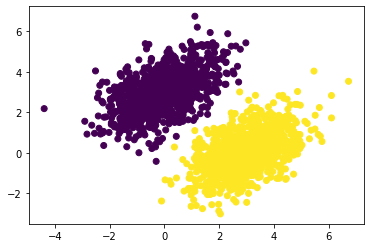

In [17]:
# plotting the 2 point classes
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [18]:
# creating the linear classifier variables
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [19]:
# forward pass function
def model(inputs):
    return tf.matmul(inputs, W) + b

In [20]:
# mean squared error loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [21]:
# training step function
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [22]:
# batch trsining loop
for step in range(20):
    loss = training_step(inputs, targets)
    print('Loss at step %d: %.4f' % (step, loss))

Loss at step 0: 0.2073
Loss at step 1: 0.1082
Loss at step 2: 0.0908
Loss at step 3: 0.0835
Loss at step 4: 0.0781
Loss at step 5: 0.0733
Loss at step 6: 0.0689
Loss at step 7: 0.0649
Loss at step 8: 0.0613
Loss at step 9: 0.0580
Loss at step 10: 0.0550
Loss at step 11: 0.0523
Loss at step 12: 0.0498
Loss at step 13: 0.0475
Loss at step 14: 0.0455
Loss at step 15: 0.0436
Loss at step 16: 0.0419
Loss at step 17: 0.0403
Loss at step 18: 0.0389
Loss at step 19: 0.0376


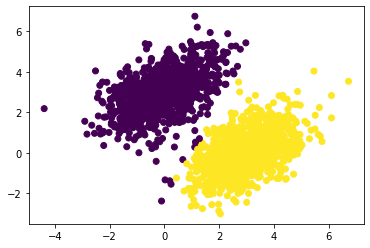

In [23]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

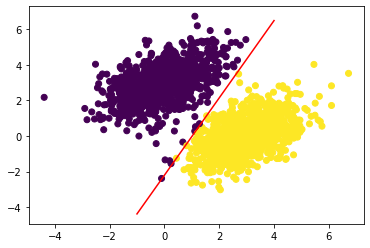

In [24]:
# plotting the line, for which the classifier finds the parameters
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

### Anatomy of a neural network: understanding core Keras API

In [25]:
# the base 'layer' class in Keras: an object that incapsulates weights and a forward pass 
import numpy as np
import tensorflow as tf
from tensorflow import keras

class SimpleDense(keras.layers.Layer):
    
    def __init__(self, units, activation=None):
        super(SimpleDense, self).__init__()
        self.units = units
        self.activation = activation
        
    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                initializer='random_normal')
        self.b = self.add_weight(shape=(self.units,),
                                initializer='zeros')

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [26]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [27]:
# automatic shape inference: building layers on the fly
from tensorflow.keras import layers
layer = layers.Dense(32, activation='relu')

In [28]:
# the added layers are dynamically built to match the shape of the incoming layer
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
layers.Dense(32, activation='relu'),
layers.Dense(32)
])

In [ ]:
# with a NaiveDense layer - chapter 2 - you have to pass the layer's input size explicitly to the constructor,
# in order to get its weights
model = NaiveSequential([
NaiveDense(input_size=784, output_size=32, activation='relu'),
NaiveDense(input_size=32, output_size=64, activation='relu'),
NaiveDense(input_size=64, output_size=32, activation='relu'),
NaiveDense(input_size=32, output_size=10, activation='softmax')
])

In [29]:
# applies automatic shape inference
model = keras.Sequential([
SimpleDense(32, activation='relu'),
SimpleDense(64, activation='relu'),
SimpleDense(32, activation='relu'),
SimpleDense(10, activation='softmax')
])

### From layers to models

In [30]:
# the "compile" step: configuring the learning process
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer='rmsprop',
loss='mean_squared_error',
metrics=['accuracy'])

In [31]:
model.compile(optimizer=keras.optimizers.RMSprop(),
            loss=keras.losses.MeanSquaredError(),
            metrics=[keras.metrics.BinaryAccuracy()])

In [ ]:
# sample showing the use of 'learning_rate' argument
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
            loss=my_custom_loss,
            metrics=[my_custom_metric_1, my_custom_metric_2])

In [32]:
# calling 'fit' with NumPy data
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 637us/step - loss: 13.0237 - binary_accuracy: 0.0390
Epoch 2/5
16/16 [==============================] - 0s 586us/step - loss: 12.5931 - binary_accuracy: 0.0400
Epoch 3/5
16/16 [==============================] - 0s 584us/step - loss: 12.2277 - binary_accuracy: 0.0405
Epoch 4/5
16/16 [==============================] - 0s 601us/step - loss: 11.8734 - binary_accuracy: 0.0415
Epoch 5/5
16/16 [==============================] - 0s 537us/step - loss: 11.5255 - binary_accuracy: 0.0415


In [33]:
# 'History' object contains  dictionary mapping keys to the list of their per-epoch values
history.history

{'loss': [13.023746490478516,
  12.593077659606934,
  12.22769832611084,
  11.87337589263916,
  11.525514602661133],
 'binary_accuracy': [0.039000000804662704,
  0.03999999910593033,
  0.04050000011920929,
  0.04149999842047691,
  0.04149999842047691]}

In [34]:
# using the validation data argument
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
            loss=keras.losses.MeanSquaredError(),
            metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[-num_validation_samples:]
val_targets = shuffled_targets[-num_validation_samples:]
training_inputs = shuffled_inputs[:num_validation_samples]
training_targets = shuffled_targets[:num_validation_samples]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
38/38 [==============================] - 0s 3ms/step - loss: 0.1772 - binary_accuracy: 0.9400 - val_loss: 0.0442 - val_binary_accuracy: 0.9850
Epoch 2/5
38/38 [==============================] - 0s 1ms/step - loss: 0.0602 - binary_accuracy: 0.9700 - val_loss: 0.0261 - val_binary_accuracy: 0.9983
Epoch 3/5
38/38 [==============================] - 0s 1ms/step - loss: 0.0742 - binary_accuracy: 0.9583 - val_loss: 0.0315 - val_binary_accuracy: 0.9983
Epoch 4/5
38/38 [==============================] - 0s 1ms/step - loss: 0.0639 - binary_accuracy: 0.9633 - val_loss: 0.0288 - val_binary_accuracy: 0.9983
Epoch 5/5
38/38 [==============================] - 0s 1ms/step - loss: 0.0657 - binary_accuracy: 0.9617 - val_loss: 0.0569 - val_binary_accuracy: 0.9883


In [35]:
# New inputs are generated randomly as in the example above (cells 12-16)
# generating 2 classes of random points in a 2D plane
num_samples_per_class = 1000
negative_samples1 = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
positive_samples1 = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

In [36]:
# stacking the 2 classes into an array with shape (2000,2)
inputs1 = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [37]:
# generating the corresponding targets (0 and 1)
targets1 = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                    np.ones((num_samples_per_class, 1), dtype='float32')))

In [ ]:
###

In [38]:
# Inference, i.e. using a model after training to make predictions on new data
# naive approach, calling the the model
predictions = model(inputs1)

In [39]:
# predict() method iterates ove the data in small batches and returns a NumPy array of predictions
predictions = model.predict(inputs1, batch_size=128)
print(predictions[:10])

[[ 0.37093207]
 [ 0.02768368]
 [ 0.21935695]
 [ 0.06769729]
 [ 0.0637866 ]
 [-0.02186275]
 [ 0.10061923]
 [ 0.1237433 ]
 [ 0.06748474]
 [ 0.16049993]]
